In [1]:
import geopandas as gpd

import pandas as pd
import numpy as np

import folium
from folium import plugins

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
건축물 = pd.read_csv('4.광양시_건축물_표제부.csv')

### 건물 주용도 시각화


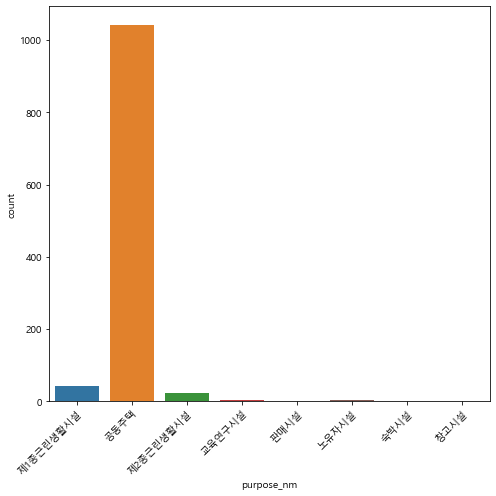

In [4]:
plt.figure(figsize = (7, 7))
ax = sns.countplot(x = 'purpose_nm', data = 건축물);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
plt.tight_layout()
plt.show()

### 건물 주용도와 세대수 결합

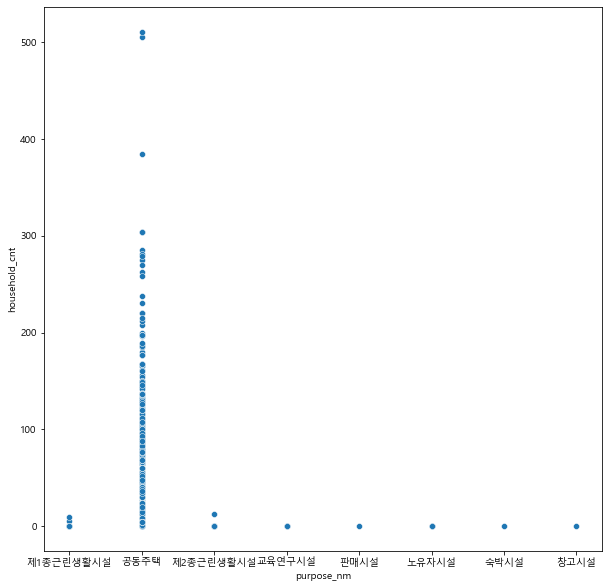

In [9]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'purpose_nm', y = 'household_cnt', data = 건축물)
plt.show()

### 주용도가 공동주택으로 분류된 건물들의 상세용도 시각화

- 활용방안 : 지도데이터와 결합, 아파트의 수를 좀 더 명확하게 수치화하여 나타내 줄 수 있음
- 결과 : 아파트 > 빌라 > 주민공동시설 > 다세대주택 ... 순

In [12]:
# 전처리
df4 = pd.read_csv('4.광양시_건축물_표제부(수정).csv')
df4 = df4[df4.purpose_nm == '공동주택']
df4.value_counts('etc_purpose_nm')

etc_purpose_nm
아파트       668
빌라         97
주민공동시설     88
다세대주택      75
지하주차장      67
생활편익시설     43
오피스텔        3
dtype: int64

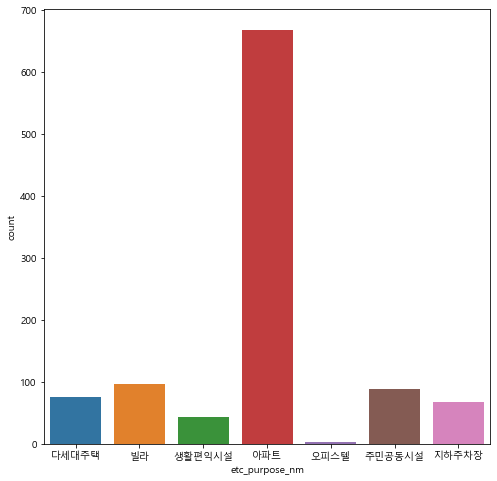

In [14]:
# 시각화
plt.figure(figsize = (8, 8))
sns.countplot(x = 'etc_purpose_nm', data = df4);

## 건물 용도별 시각화

### 주거용도 건물만 따로 구분
    
- 활용방안 : EDA
- 목적 : 광양시의 어떤곳에 어떤 주거용도의 건물이 존재하는지 한눈에 알아보기 위함
- 결과 : 광양시청, 광양시청 2청사, 광영동 주변 다수의 주택단지가 분포해있음을 알 수 있었음


In [15]:
광양맵 = folium.Map(location = [34.95546078520162, 127.66277312740414],
                tiles = 'Stamen Terrain', 
                zoom_start = 11)


for i in df4.index:
    
    color = 'green'
    if df4.loc[i, 'etc_purpose_nm'] == '아파트':
        color = 'red'
    elif df4.loc[i, 'etc_purpose_nm'] == '다세대주택':
        color = 'black'
    elif df4.loc[i, 'etc_purpose_nm'] == '빌라':
        color = 'orange'
    marker1 = folium.Marker([df4.loc[i]['lat'], df4.loc[i]['lon']],
                          icon = folium.Icon(color = color))
    marker1.add_to(광양맵)
광양맵

### 6번파일 ( '6.광양시_법정경계(읍면동).geojson' )

- 활용방안 : PPT에 삽입되는 모든 지도데이터시각화의 기본틀이 될 수 있음.

<AxesSubplot:>

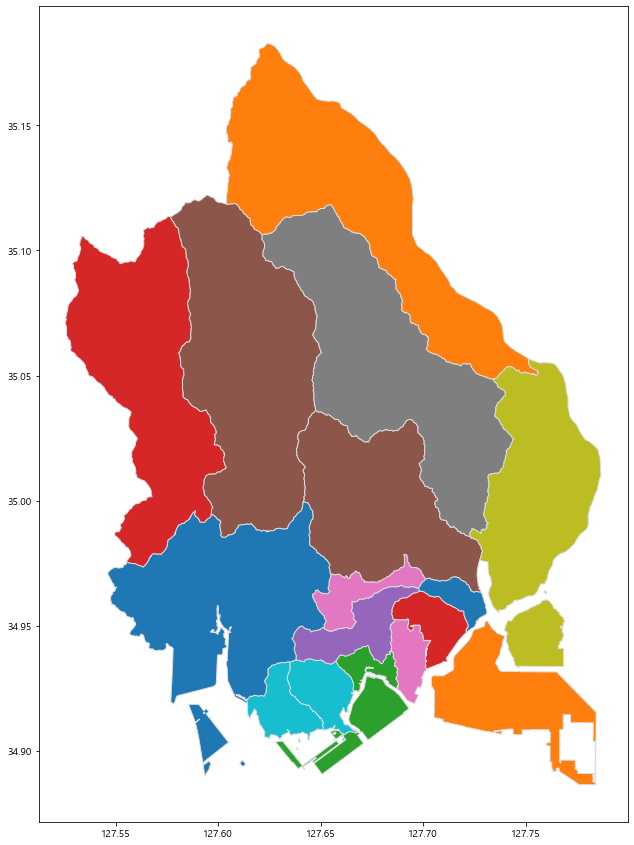

In [16]:
a = gpd.read_file('6.광양시_법정경계(읍면동).geojson')

#a.plot(column = "emd_nm", figsize = (15, 15))
a.plot(figsize = (15, 15), column = 'emd_nm', color = None, edgecolor='gainsboro')